In [87]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import utils 
import pandas as pd

In [103]:
delays = [0, 10, 50, 100, 250]

In [104]:
def plot_loss_curves(loss_arrays, title=""):
    """
    Plots multiple loss curves on a single Seaborn plot.

    Parameters:
    loss_arrays (list of numpy arrays): Each entry in the list is a 1D numpy array representing 
                                        the loss over multiple training steps for a different model.
    """
    plt.figure(figsize=(10, 6))
    
    # Plot each loss curve
    for i, loss_array in enumerate(loss_arrays):
        sns.lineplot(x=np.arange(len(loss_array)), y=loss_array, label=f'Max Delay {delays[i]}')
    
    plt.xlabel('Updates')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.show()

In [105]:
losses_arr = [] 

base = np.load(f"data/trials/losses/ppo_losses_1000.npz")
losses_arr.append(base['losses'])

for i, delay in enumerate(delays): 
    if i > 0: 
        data = np.load(f"data/trials/losses/dppo_losses_epochs_1000_delay_{delay}.npz")
        losses_arr.append(data['losses'])
    

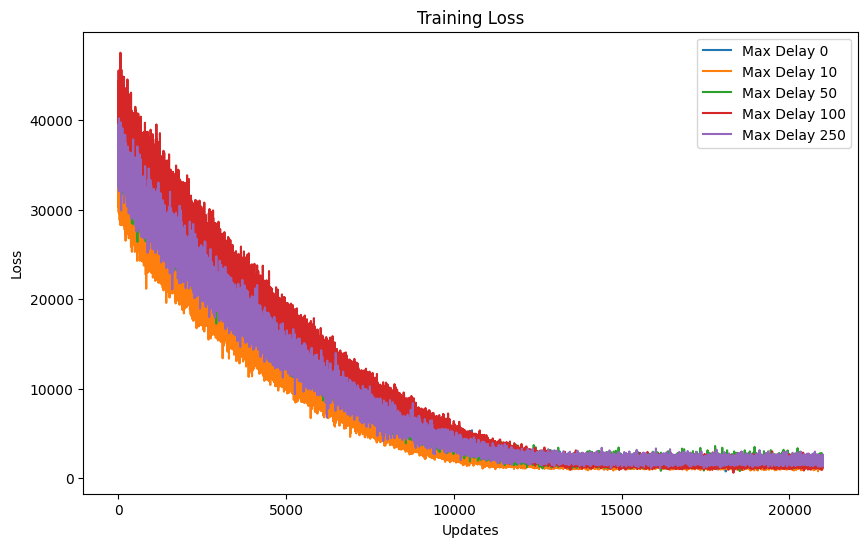

In [106]:
plot_loss_curves(losses_arr, "Training Loss")

In [44]:
value_losses = [] 

base = np.load(f"data/trials/losses/ppo_losses_1000.npz")
value_losses.append(base['value_losses'])

for i, delay in enumerate(delays): 
    if i > 0: 
        data = np.load(f"data/trials/losses/dppo_losses_epochs_1000_delay_{delay}.npz")
        value_losses.append(data['value_losses'])

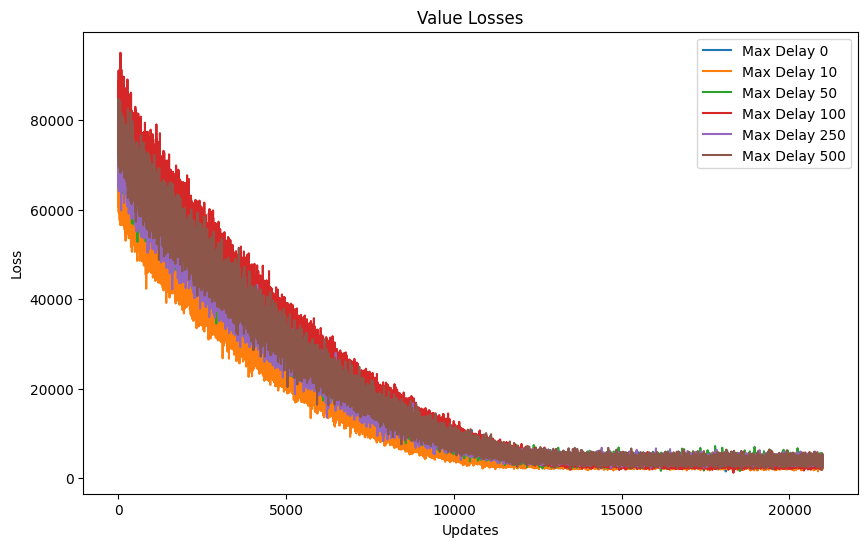

In [51]:
plot_loss_curves(value_losses, "Value Losses")

In [107]:
entropy_losses = [] 

base = np.load(f"data/trials/losses/ppo_losses_1000.npz")
entropy_losses.append(base['entropy_losses'])

for i, delay in enumerate(delays): 
    if i > 0: 
        data = np.load(f"data/trials/losses/dppo_losses_epochs_1000_delay_{delay}.npz")
        entropy_losses.append(data['entropy_losses'])

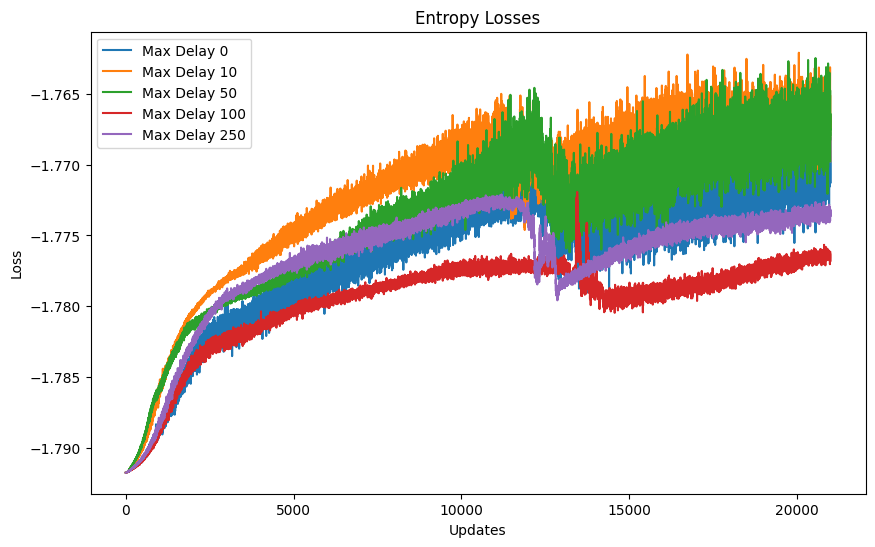

In [108]:
plot_loss_curves(entropy_losses, "Entropy Losses")

In [76]:
rollouts = utils.read_json("data/trials/rollouts/ppo_run_rollouts_1000.json")

In [77]:
observations = rollouts[0]
actions = rollouts[1]

In [78]:
trajs = list(zip(observations, actions))

In [89]:
def calculate_reward(trajs, reward_f):
    rewards = [] 

    for t in trajs: 
        reward = 0 
        for step, p in enumerate(t): 
            obv = t[0][step]
            action = t[1][step]
            reward += reward_f[obv, action]
        
        rewards.append(reward)

    return rewards

In [80]:
mdp_params = np.load("mdp/mdp_25.npz")

reward = mdp_params['reward']
mu = mdp_params['mu']
p_transition = mdp_params['p_transition']
states = mdp_params['states']
actions = mdp_params['n_actions']

In [98]:
rewards_arr = [] 

base = utils.read_json("data/trials/rollouts/ppo_run_rollouts_1000.json")

observations = base[0]
actions = base[1]

trajs = list(zip(observations, actions))

rewards_arr.append(calculate_reward(trajs, reward))

for i, delay in enumerate(delays): 
    if i > 0: 
        data = utils.read_json(f"data/trials/rollouts/dppo_run_rolloutss_1000_delay_{delay}.json")

        observations = data[0]
        actions = data[1]

        trajs = list(zip(observations, actions))

        rewards_arr.append(calculate_reward(trajs, reward))

1.1248571229915225
2.125075838404034
1.1760052303239152
39.57352524160018
1.1248571229915225
2.249714245983045
1.0002187154125113
52.99270899185844
1.1248571229915225
39.522377134267785
1.1248571229915225
53.117347399437456
1.1248571229915225
2.958198030042077
1.0002187154125113
39.39773872668877
1.1760052303239152
2.3008623533154378
1.8333409070505546
40.23086091832682
1.1248571229915225
2.3008623533154378
1.0002187154125113
39.39773872668877
51.992490276445935
53.117347399437456
38.397520011276264
39.39773872668877
51.992490276445935
90.39001028772219
51.992490276445935
52.99270899185844
51.992490276445935
90.39001028772219
51.992490276445935
90.39001028772219
51.992490276445935
103.98498055289187
1.1760052303239152
2.1762239457364263
51.992490276445935
53.16849550676985
38.397520011276264
39.522377134267785
1.0002187154125113
39.39773872668877
1.8333409070505546
53.82583118349649
1.1248571229915225
2.125075838404034
1.0002187154125113
2.125075838404034
38.397520011276264
39.57352524

In [101]:
avgs = [np.average(reward) for reward in rewards_arr]

In [102]:
avgs

[32.817604249900704,
 29.885442757333823,
 32.3772675106621,
 34.295366801225555,
 30.885365687641492,
 32.18682255905253]

In [92]:
rewards = calculate_reward(trajs, reward)

1.1248571229915225
2.125075838404034
1.1760052303239152
39.57352524160018
1.1248571229915225
2.249714245983045
1.0002187154125113
52.99270899185844
1.1248571229915225
39.522377134267785
1.1248571229915225
53.117347399437456
1.1248571229915225
2.958198030042077
1.0002187154125113
39.39773872668877
1.1760052303239152
2.3008623533154378
1.8333409070505546
40.23086091832682
1.1248571229915225
2.3008623533154378
1.0002187154125113
39.39773872668877
51.992490276445935
53.117347399437456
38.397520011276264
39.39773872668877
51.992490276445935
90.39001028772219
51.992490276445935
52.99270899185844
51.992490276445935
90.39001028772219
51.992490276445935
90.39001028772219
51.992490276445935
103.98498055289187
1.1760052303239152
2.1762239457364263
51.992490276445935
53.16849550676985
38.397520011276264
39.522377134267785
1.0002187154125113
39.39773872668877
1.8333409070505546
53.82583118349649
1.1248571229915225
2.125075838404034
1.0002187154125113
2.125075838404034
38.397520011276264
39.57352524

In [83]:
rewards

[2.125075838404034,
 39.57352524160018,
 2.249714245983045,
 52.99270899185844,
 39.522377134267785,
 53.117347399437456,
 2.958198030042077,
 39.39773872668877,
 2.3008623533154378,
 40.23086091832682,
 2.3008623533154378,
 39.39773872668877,
 53.117347399437456,
 39.39773872668877,
 90.39001028772219,
 52.99270899185844,
 90.39001028772219,
 90.39001028772219,
 103.98498055289187,
 2.1762239457364263,
 53.16849550676985,
 39.522377134267785,
 39.39773872668877,
 53.82583118349649,
 2.125075838404034,
 2.125075838404034,
 39.57352524160018,
 3.6666818141011093,
 2.833559622463066,
 2.125075838404034,
 3.00934613737447,
 90.39001028772219,
 39.522377134267785,
 39.39773872668877,
 2.833559622463066,
 2.125075838404034,
 2.1762239457364263,
 90.39001028772219,
 2.1762239457364263,
 2.1762239457364263,
 76.79504002255253,
 90.39001028772219,
 52.99270899185844,
 3.00934613737447,
 2.0004374308250226,
 39.57352524160018,
 53.16849550676985,
 39.57352524160018,
 76.79504002255253,
 2.30086

In [85]:
def plot_rewards(rewards):
    """
    Plots a line plot of rewards across epochs using Seaborn.

    Args:
    rewards (np.array): A one-dimensional numpy array of total rewards per epoch.
    """
    # Convert array data into a DataFrame for Seaborn
    data = pd.DataFrame({
        'Epochs': np.arange(len(rewards)),
        'Total Rewards': rewards
    })

    # Creating the line plot using Seaborn
    sns.lineplot(x='Epochs', y='Total Rewards', data=data)

    # Optional: Set the labels and title using Matplotlib functions
    plt.xlabel('episode')              # Label for x-axis
    plt.ylabel('total reward')       # Label for y-axis
    plt.title('') # Title of the plot

    plt.show()   

In [91]:
np.average(rewards)

32.817604249900704

In [109]:
d = np.load("data/trials/policies/dppo_policy_epochs_1000_delay_10.npz")

In [111]:
log_probs = d['log_prob']

In [113]:
log_probs.shape

(2048, 1)

In [118]:
delay_10_policy = np.load("data/trials/policies/ppo_policy_epochs_1000.npz")['policy']

array([[0.20003606, 0.20016512, 0.19948786, 0.13351843, 0.13329807,
        0.13349442],
       [0.20003606, 0.20016512, 0.19948786, 0.13351843, 0.13329807,
        0.13349442],
       [0.19933057, 0.19092503, 0.1993705 , 0.13371599, 0.13366741,
        0.14299048],
       [0.20003606, 0.20016512, 0.19948786, 0.13351843, 0.13329807,
        0.13349442],
       [0.16102447, 0.20031936, 0.13317621, 0.19964156, 0.13364878,
        0.1721897 ],
       [0.20003606, 0.20016512, 0.19948786, 0.13351843, 0.13329807,
        0.13349442],
       [0.13372256, 0.13978991, 0.1330209 , 0.19403832, 0.19996445,
        0.19946389],
       [0.19970097, 0.13317008, 0.13390262, 0.19977471, 0.20002459,
        0.13342704],
       [0.20003606, 0.20016512, 0.19948786, 0.13351843, 0.13329807,
        0.13349442],
       [0.13328594, 0.16697143, 0.13319696, 0.16819778, 0.1986058 ,
        0.19974208],
       [0.16102447, 0.20031936, 0.13317621, 0.19964156, 0.13364878,
        0.1721897 ],
       [0.16102447, 0